# WeatherPy

In this exercise, I created a script to visualize the weather of 500+ cities across the world of varying distance from the equator using the OpenWeatherMap API. From this data, a series of scatter plots are made to determine the relationship, if any, between a city's latitude and various weather conditions.

### Analysis

1. There is a definite correlation between the latitude of a city and it's maximum temperature. The farther away a city is from the equator, the lower the maximum temperature is. This correlation in the southern hemisphere is slightly stronger with an r-squared value of 0.62, compared to the one in the north at 0.53.

![Max Temperature vs Latitude](images/lat_vs_temp.png)


2. There was almost no correlation between Humdity and Latitude in the northern hemisphere and only a slight negative correlation in the southern hemisphere, with both the r-squared values being close to zero (0.00 vs. 0.02, repectively).

![Humidity vs Latitude](images/lat_vs_humidity.png)


3. While the southern hemisphere has a slight negative correlation when looking at Cloudiness vs. Latitude, both the r-squared values for the northern and southern hemisphere are close to zero (0.00 vs. 0.02, repectively).

![Cloudiness vs Latitude](images/lat_vs_cloudiness.png)


4. Wind Speed vs. Latitude shows a slight negative correlation for both the northern and southern hemisphere, however both the r-squared values are being close to zero (0.03 vs. 0.01, repectively).

![Wind Speed vs Latitude](images/lat_vs_wind_speed.png)

**Conclusion**

Out of all the weather conditions looked at in this study, the only one with a strong correlation to latitude is maximum temperature. For the southern hemisphere, especially, 62% of the variance can be explained by the linear model. 

## Setup and Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

## Perform API Calls

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query_url = f'{base_url}appid={weather_api_key}&q={city}&units={units}'
# Get weather data
weather_response = requests.get(query_url).json()

In [4]:
# Create lists to hold the data
city_name = []
country = []
temp_min = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
date = []

# Create counters for count and set starting numbers
counter = 0
set_number = 1


# Create loop to pull and store weather data from each city with a series of successive API calls
# Print log of each city as it's being processed 

for city in cities:
    try:
        query_url = f'{base_url}appid={weather_api_key}&q={city}&units={units}'
        weather_response = requests.get(query_url).json()
        
        city_name.append(weather_response['name'])
        country.append(weather_response['sys']['country'])
        temp_min.append(weather_response['main']['temp_min'])
        temp_max.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        date.append(weather_response['dt'])
        
        if counter > 49:
            counter = 1
            set_number += 1
        else:
            counter += 1
        
        for city in city_name:
            city.title()
            

        print(f"Processing Record {counter} for Set {set_number} |{city}")     

    
    except Exception:
        print(f"City not found. Skipping...")

print("------------------------")
print(f"Data Retrieval Complete")
print("------------------------")

City not found. Skipping...
Processing Record 1 for Set 1 |Lebu
Processing Record 2 for Set 1 |Torgau
Processing Record 3 for Set 1 |Algiers
Processing Record 4 for Set 1 |Oistins
Processing Record 5 for Set 1 |Vila Franca do Campo
City not found. Skipping...
Processing Record 6 for Set 1 |Cape Town
Processing Record 7 for Set 1 |Dingle
Processing Record 8 for Set 1 |Yellowknife
Processing Record 9 for Set 1 |Hobart
Processing Record 10 for Set 1 |East London
Processing Record 11 for Set 1 |Itoman
Processing Record 12 for Set 1 |Saint-Marc
Processing Record 13 for Set 1 |Norman Wells
Processing Record 14 for Set 1 |Rikitea
Processing Record 15 for Set 1 |Ushuaia
Processing Record 16 for Set 1 |Saskylakh
Processing Record 17 for Set 1 |Mayskiy
Processing Record 18 for Set 1 |Anadyr
Processing Record 19 for Set 1 |Guozhen
Processing Record 20 for Set 1 |Camocim
Processing Record 21 for Set 1 |Busselton
Processing Record 22 for Set 1 |Nanortalik
Processing Record 23 for Set 1 |Mataura
Pro

Processing Record 40 for Set 4 |Yulara
Processing Record 41 for Set 4 |Kloulklubed
Processing Record 42 for Set 4 |Lichinga
Processing Record 43 for Set 4 |Regierungsbezirk Arnsberg
Processing Record 44 for Set 4 |Tiksi
Processing Record 45 for Set 4 |Bengkulu
Processing Record 46 for Set 4 |Port Blair
Processing Record 47 for Set 4 |Samarai
Processing Record 48 for Set 4 |Voh
Processing Record 49 for Set 4 |Charlestown
Processing Record 50 for Set 4 |Kidal
Processing Record 1 for Set 5 |Kayerkan
Processing Record 2 for Set 5 |Harper
Processing Record 3 for Set 5 |Hambantota
City not found. Skipping...
Processing Record 4 for Set 5 |Cockburn Town
Processing Record 5 for Set 5 |San Policarpo
Processing Record 6 for Set 5 |Faya
Processing Record 7 for Set 5 |Port Lincoln
City not found. Skipping...
Processing Record 8 for Set 5 |Kavaratti
Processing Record 9 for Set 5 |Mar del Plata
Processing Record 10 for Set 5 |Bournemouth
Processing Record 11 for Set 5 |Warora
Processing Record 12 fo

City not found. Skipping...
Processing Record 30 for Set 8 |Tamandaré
Processing Record 31 for Set 8 |Benemérito de las Américas
Processing Record 32 for Set 8 |Palana
City not found. Skipping...
Processing Record 33 for Set 8 |Kualakapuas
Processing Record 34 for Set 8 |Monaghan
Processing Record 35 for Set 8 |Mahabalipuram
Processing Record 36 for Set 8 |Byron Bay
Processing Record 37 for Set 8 |Gayny
Processing Record 38 for Set 8 |Pochutla
Processing Record 39 for Set 8 |Mossamedes
City not found. Skipping...
Processing Record 40 for Set 8 |Aksu
Processing Record 41 for Set 8 |Deputatsky
Processing Record 42 for Set 8 |Kalmunai
Processing Record 43 for Set 8 |Kiryat Gat
Processing Record 44 for Set 8 |Strezhevoy
Processing Record 45 for Set 8 |Cherskiy
Processing Record 46 for Set 8 |Cologne
Processing Record 47 for Set 8 |Senno
Processing Record 48 for Set 8 |Santa Cruz de La Palma
Processing Record 49 for Set 8 |Meadow Lake
Processing Record 50 for Set 8 |Saldanha
Processing Reco

In [5]:
# Create a data frame
weather_dict = {
    "City Name": city_name,
    "Latitude": lat,
    "Longitude": lng,
    "Min Temp": temp_min,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_df = pd.DataFrame(weather_dict)
weather_df.reset_index(drop=True)

# Output file to csv
weather_df.to_csv(r'data\weather_data.csv', index=False)

# Display DataFrame counts
weather_df.count()

City Name     548
Latitude      548
Longitude     548
Min Temp      548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [6]:
# Display the DataFrame

weather_df.head()

,City Name,Latitude,Longitude,Min Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.62,-73.65,51.57,51.57,72,61,11.32,CL,1596659003
1,Torgau,51.57,13.00,66.00,69.80,43,40,5.82,DE,1596659003
2,Algiers,36.75,3.04,77.00,77.00,65,0,13.87,DZ,1596658984
3,Oistins,13.07,-59.53,87.80,87.80,62,40,16.11,BB,1596659004
4,Vila Franca do Campo,37.72,-25.43,73.40,73.40,83,40,10.29,PT,1596658999


## Inspect the data and remove cities with humidity > 100%

In [7]:
clean_city_data = weather_df.copy()

# Check for humidity greater than 100%
humidity_check = clean_city_data[clean_city_data['Humidity'] > 100]

# Get the indices of cities that have humidity over 100%.
humidity_check.index

Int64Index([], dtype='int64')

In [8]:
# Drop any cities with humidity greater than 100%
humidity_drop = clean_city_data[clean_city_data['Humidity'] > 100].index
clean_city_data.drop(humidity_drop).reset_index(drop=True)
clean_city_data.count()

City Name     548
Latitude      548
Longitude     548
Min Temp      548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [9]:
# Extract relevant fields from the data frame
# Export the clean_city_data into a csv

clean_city_data.to_csv(r'data\clean_city_data.csv', index=False)

## Latitude vs. Temperature Plot

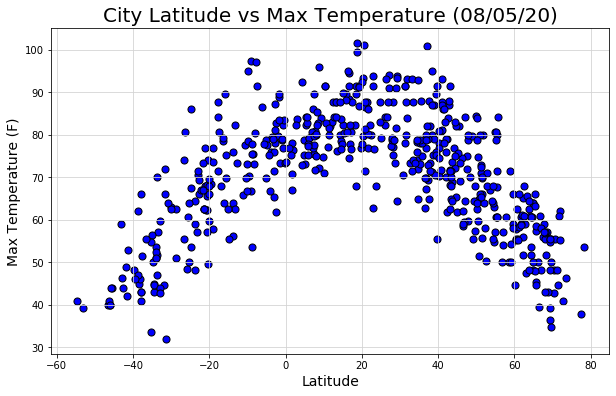

In [46]:
# Generate scatter plot
plt.figure(figsize=(10,6))                             
plt.scatter(clean_city_data['Latitude'], clean_city_data['Max Temp'], marker="o", s=50, facecolors="blue", edgecolors="black", )

# Format chart
plt.title("City Latitude vs Max Temperature (08/05/20)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Max Temperature (F)", fontsize = 14)
plt.grid(color="lightgrey" )

# Save image
plt.savefig("images/lat_vs_temp.png")

plt.show()

## Latitude vs. Humidity Plot

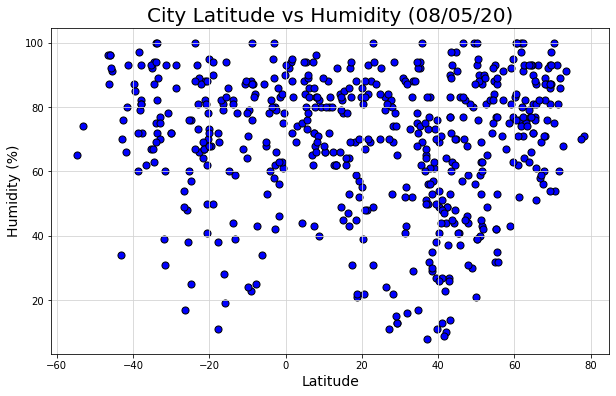

In [47]:
# Generate scatter plot
plt.figure(figsize=(10,6))                             
plt.scatter(clean_city_data['Latitude'], clean_city_data['Humidity'], marker="o", s=50, facecolors="blue", edgecolors="black", )

# Format chart
plt.title("City Latitude vs Humidity (08/05/20)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Humidity (%)", fontsize = 14)
plt.grid(color="lightgrey" )

# Save image
plt.savefig("images/lat_vs_humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

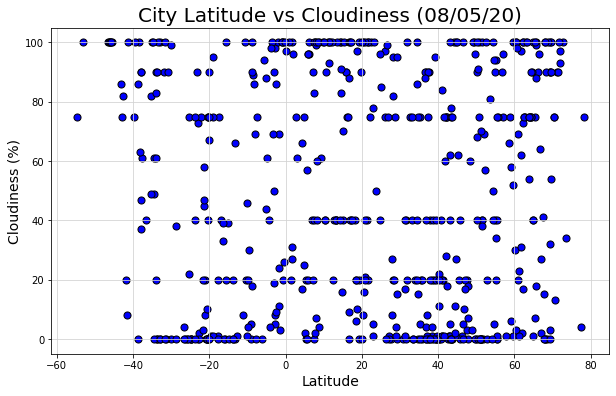

In [48]:
# Generate scatter plot
plt.figure(figsize=(10,6))                             
plt.scatter(clean_city_data['Latitude'], clean_city_data['Cloudiness'], marker="o", s=50, facecolors="blue", edgecolors="black", )

# Format chart
plt.title("City Latitude vs Cloudiness (08/05/20)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Cloudiness (%)", fontsize = 14)
plt.grid(color="lightgrey" )

# Save image
plt.savefig("images/lat_vs_cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

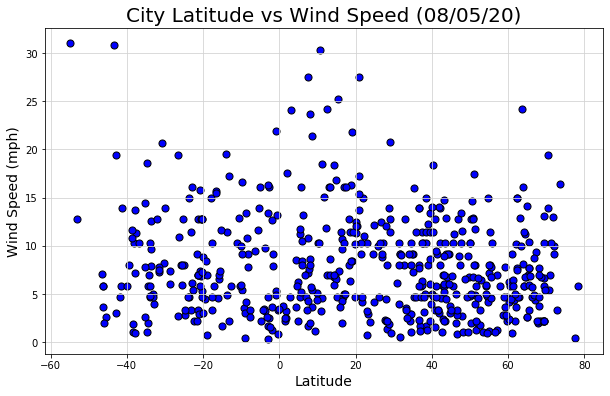

In [49]:
# Generate scatter plot
plt.figure(figsize=(10,6))                             
plt.scatter(clean_city_data['Latitude'], clean_city_data['Wind Speed'], marker="o", s=50, facecolors="blue", edgecolors="black", )

# Format chart
plt.title("City Latitude vs Wind Speed (08/05/20)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Wind Speed (mph)", fontsize = 14)
plt.grid(color="lightgrey" )

# Save image
plt.savefig("images/lat_vs_wind_speed.png")

plt.show()

## Linear Regression

In [28]:
# Create Northern Hemisphere DataFrame
northern_data = (clean_city_data[clean_city_data['Latitude'] >= 0]).reset_index(drop=True)
northern_data.head()

,City Name,Latitude,Longitude,Min Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torgau,51.57,13.00,66.00,69.80,43,40,5.82,DE,1596659003
1,Algiers,36.75,3.04,77.00,77.00,65,0,13.87,DZ,1596658984
2,Oistins,13.07,-59.53,87.80,87.80,62,40,16.11,BB,1596659004
3,Vila Franca do Campo,37.72,-25.43,73.40,73.40,83,40,10.29,PT,1596658999
4,Dingle,11.00,122.67,77.23,77.23,88,100,3.27,PH,1596659005


In [29]:
# Create Southern Hemisphere DataFrame
southern_data = (clean_city_data[clean_city_data['Latitude'] < 0]).reset_index(drop=True)
southern_data.head()

,City Name,Latitude,Longitude,Min Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.62,-73.65,51.57,51.57,72,61,11.32,CL,1596659003
1,Cape Town,-33.93,18.42,44.60,51.01,75,20,4.70,ZA,1596659005
2,Hobart,-42.88,147.33,44.01,46.40,70,75,19.46,AU,1596658781
3,East London,-33.02,27.91,59.79,59.79,77,100,4.99,ZA,1596659006
4,Rikitea,-23.12,-134.97,70.47,70.47,81,73,11.45,PF,1596658775


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r is: -0.7283745626403002
The r-squared is: 0.5305295035014486


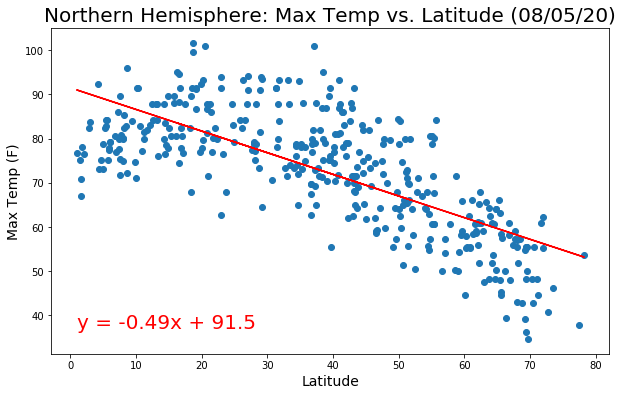

In [38]:
# Calculation the linear regression model
x_values = northern_data['Latitude']
y_values = northern_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere: Max Temp vs. Latitude (08/05/20)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Max Temp (F)", fontsize = 14)
plt.annotate(line_eq_1, (1,37), fontsize=20,color="red")

# Print the r and r-squared values
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Save image
plt.savefig("images/northern_max_temp_vs_lat.png")

plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r is: 0.7902177939616764
The r-squared is: 0.6244441618936584


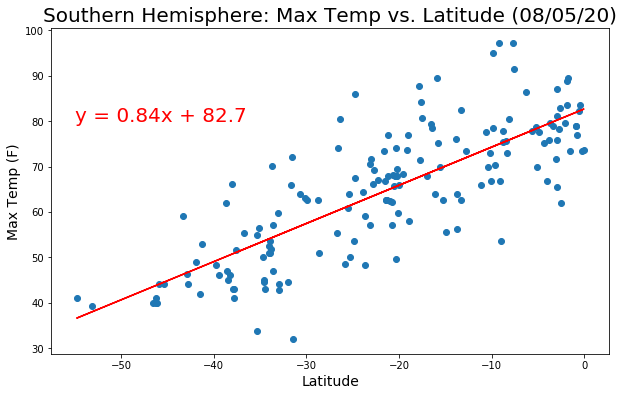

In [39]:
# Calculation the linear regression model
x_values = southern_data['Latitude']
y_values = southern_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere: Max Temp vs. Latitude (08/05/20)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Max Temp (F)", fontsize = 14)
plt.annotate(line_eq_2, (-55,80), fontsize=20,color="red")

# Print the r and r-squared values
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Save image
plt.savefig("images/southern_max_temp_vs_lat.png")

plt.show()

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r is: 0.057239806552925133
The r-squared is: 0.003276395454216291


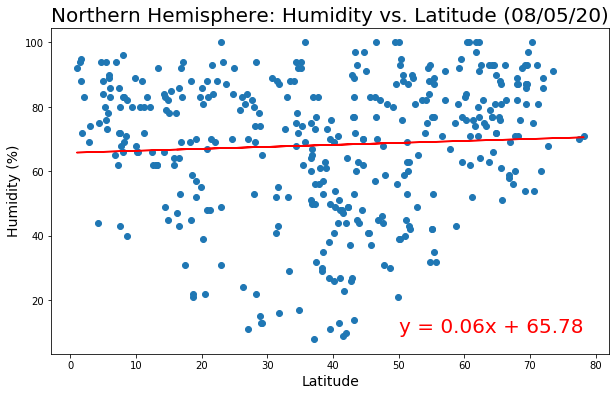

In [40]:
# Calculation the linear regression model
x_values = northern_data['Latitude']
y_values = northern_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere: Humidity vs. Latitude (08/05/20)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Humidity (%)", fontsize = 14)
plt.annotate(line_eq_3, (50,10), fontsize=20,color="red")

# Print the r and r-squared values
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Save image
plt.savefig("images/northern_humidity_vs_lat.png")

plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r is: -0.15138450773221468
The r-squared is: 0.022917269181324966


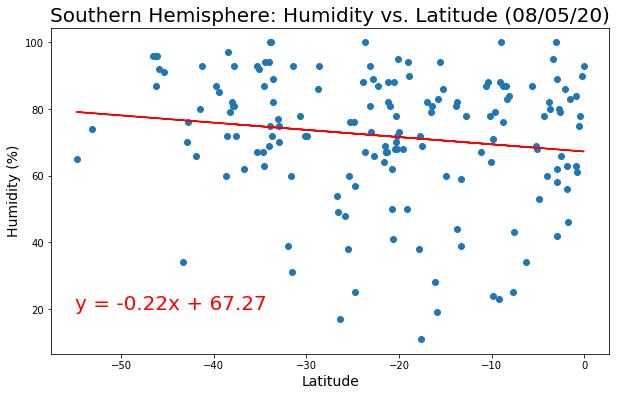

In [41]:
# Calculation the linear regression model
x_values = southern_data['Latitude']
y_values = southern_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere: Humidity vs. Latitude (08/05/20)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Humidity (%)", fontsize = 14)
plt.annotate(line_eq_4, (-55,20), fontsize=20,color="red")

# Print the r and r-squared values
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Save image
plt.savefig("images/southern_humidity_vs_lat.png")

plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r is: -0.011796888769187119
The r-squared is: 0.00013916658463257318


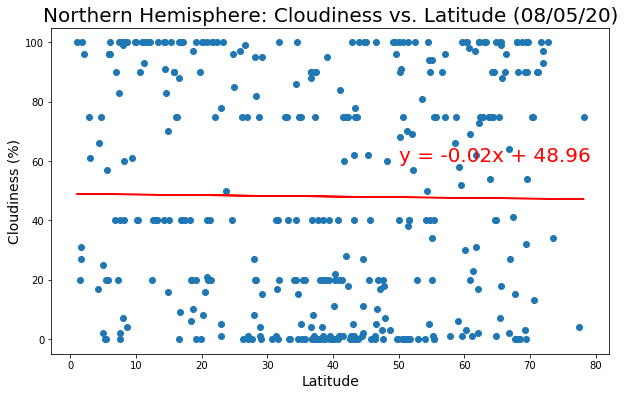

In [42]:
# Calculation the linear regression model
x_values = northern_data['Latitude']
y_values = northern_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude (08/05/20)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Cloudiness (%)", fontsize = 14)
plt.annotate(line_eq_5, (50,60), fontsize=20,color="red")

# Print the r and r-squared values
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Save image
plt.savefig("images/northern_cloudiness_vs_lat.png")

plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r is: -0.16428776628467426
The r-squared is: 0.02699047015080775


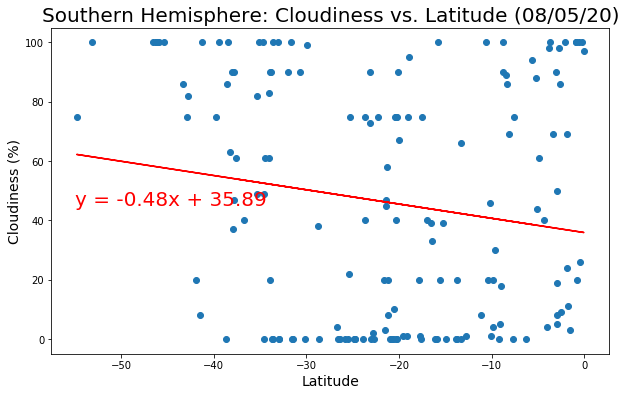

In [43]:
# Calculation the linear regression model
x_values = southern_data['Latitude']
y_values = southern_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude (08/05/20)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Cloudiness (%)", fontsize = 14)
plt.annotate(line_eq_6, (-55,45), fontsize=20,color="red")

# Print the r and r-squared values
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Save image
plt.savefig("images/southern_cloudiness_vs_lat.png")

plt.show()

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r is: -0.19550429980494233
The r-squared is: 0.03822193124222077


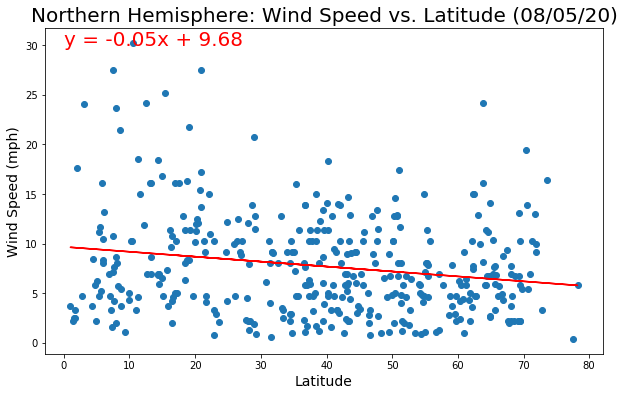

In [44]:
# Calculation the linear regression model
x_values = northern_data['Latitude']
y_values = northern_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude (08/05/20)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Wind Speed (mph)", fontsize = 14)
plt.annotate(line_eq_7, (0,30), fontsize=20,color="red")

# Print the r and r-squared values
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Save image
plt.savefig("images/northern_wind_speed_vs_lat.png")

plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r is: -0.12274524368025438
The r-squared is: 0.01506639484612503


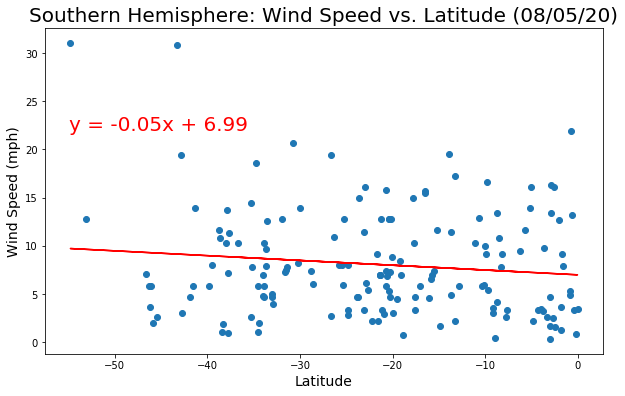

In [45]:
# Calculation the linear regression model
x_values = southern_data['Latitude']
y_values = southern_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude (08/05/20)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Wind Speed (mph)", fontsize = 14)
plt.annotate(line_eq_8, (-55,22), fontsize=20,color="red")

# Print the r and r-squared values
print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

# Save image
plt.savefig("images/southern_wind_speed_vs_lat.png")

plt.show()